# Curvas Elípticas

As curvas elípticas não são elipses. Eles são assim chamados porque são descritas por Equações cúbicas, semelhantes às utilizadas para calcular a circunferência de uma elipse. Em geral as equações cúbicas para curvas elípticas em $\mathbb{R}$ são descritas pela Equação de Weierstrass, sendo os pontos $(x, y)$ que satisfazem:

$$ y^2 + axy + by = x^3 + cx^2 + dx + e $$
Onde $a, b, c, d, e \in \mathbb{R}$.

Para facilitar a visualização e diminuir o escopo deste trabalho, nos limitaremos apenas às curvas da forma:
$$ y^2 = x^3 + ax + b$$

## SAGE: Construtor de Curvas Elípticas

Fonte: Documentação do SAGE [[1]](https://doc.sagemath.org/html/en/reference/curves/sage/schemes/elliptic_curves/constructor.html).


> In Sage, an elliptic curve is always specified by (the coefficients of) a long Weierstrass equation
> 
> $$y^2 + a_1 xy + a_3 y = x^3 + a_2 x^2 + a_4 x + a_6$$

### Exemplo: Curva $y^2 = x^3 - 3x^2 + 5$

$$ y^2 + 0\cdot xy + 0\cdot y = x^3 + 0\cdot x^2 + (-3)\cdot x + 5$$

In [10]:
E = EllipticCurve([0,0,0,-3,5])
E

Elliptic Curve defined by y^2 = x^3 - 3*x + 5 over Rational Field

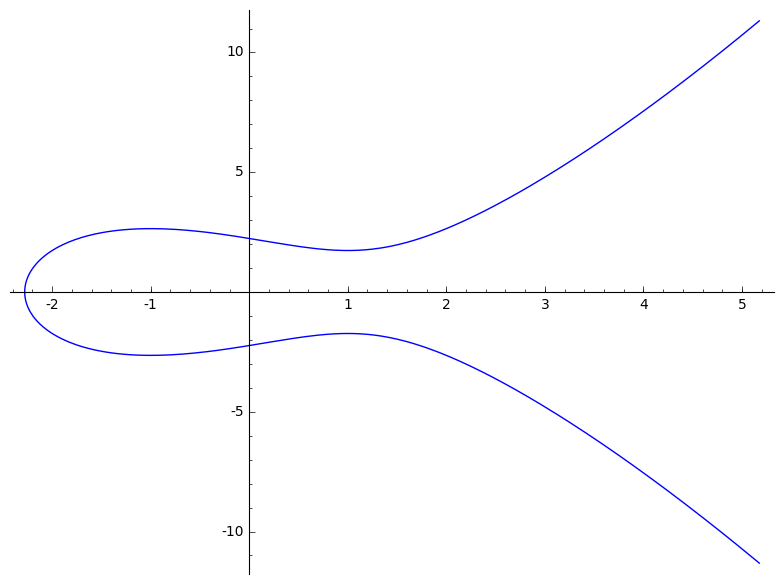

In [11]:
plot(E, thickness=1)

## Curva Elítptica sobre $\mathbb{Z}_p$

Uma curva elíptica sobre um corpo finito $\mathbb{Z}_p, p>3$, é o conjunto de todos os pares $(x,y) \in \mathbb{Z}^2_p$  tal que:

$$ y^2 \equiv x^3 + ax + b \pmod{p} $$

incluindo o ponto $\mathcal{O}$, chamado de ponto no infinito e $a,b \in \mathbb{Z}_p$ obedecem a relação:

$$4a^3 + 27b^2 \not \equiv 0 $$

### Operações no Grupo

Denotaremos a operação no grupo pelo símbolo de adição "$+$". Por adição nos referimos à seguinte operação: Dados dois pontos $P, Q \in E$, $P = (x_1,y_1), Q = (x_2, y_2)$, devemos computar as coordenadas de um terceiro ponto R tal
que:

\begin{align*}
    P + Q &= R\\
    (x_1, y_1) + (x_2, y_2) &= (x_3, y_3)
\end{align*}
onde as coordenadas do ponto $R$ serão:
\begin{align*}
    x_3 &= s^2 - x_1 - x_2 \pmod{p}\\
    y_3 &= s(x_1 - x_3 ) - y_1 \pmod{p}
\end{align*}
onde:
    $$ s = \left\{\begin{matrix}
\frac{y_2 - y_1}{x_2 - x_1} & \text{se } P_1 \ne P_2 \\
 & \\
\frac{3x_1^2 + a}{2y_1} &  \text{se } P_1 = P_2
\end{matrix}\right.$$


## Diffie Hellman num Grupo Aditivo $E$

* Escolha $P \in E$
* Alice e Bob geram $a,b$ aleatoriamente, Alice envia $aP$ e Bob envia $bP$.
    
    $$ aP = \underbrace{P + P + \ldots + P}_{\text{a vezes}} $$
    $$ bP = \underbrace{P + P + \ldots + P}_{\text{b vezes}} $$

* O segredo compartilhado é $abP$.

## SAGE: Construtor de Curvas Elípticas

In [ ]:
p = next_prime(2^1000)

In [ ]:
p

In [5]:
F = FiniteField(p)

In [6]:
F

Finite Field of size 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069673

In [7]:
C = EllipticCurve(F, [2, 3])

In [8]:
C

Elliptic Curve defined by y^2 = x^3 + 2*x + 3 over Finite Field of size 10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069673

## Curva M-221 [[2013 Aranha–Barreto–Pereira–Ricardini]](https://eprint.iacr.org/2013/647.pdf)

$$ y^2 = x^3+117050x^2+x \pmod{ 2^{221} - 3 }$$

In [1]:
p = 2^(221) - 3

In [2]:
F = FiniteField(p)

In [6]:
E = EllipticCurve(F, [0, 117050, 0, 1, 0])

In [7]:
E

Elliptic Curve defined by y^2 = x^3 + 117050*x^2 + x over Finite Field of size 3369993333393829974333376885877453834204643052817571560137951281149

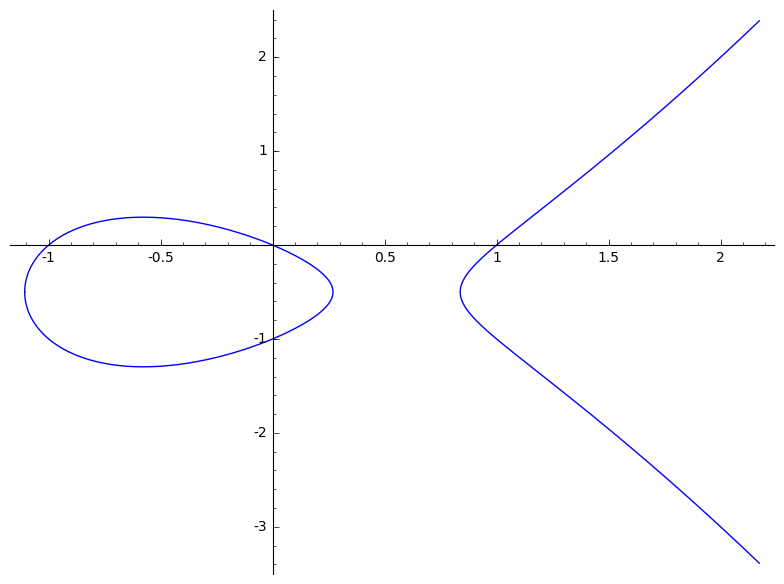

In [6]:
plot(E)

## Curva M-383 [[2013 Aranha–Barreto–Pereira–Ricardini]](https://eprint.iacr.org/2013/647.pdf)

$$ y^2 = x^3+2065150x^2+x  \pmod{2^{383} - 187} $$

## Curva M-511 [[2013 Aranha–Barreto–Pereira–Ricardini]](https://eprint.iacr.org/2013/647.pdf)

$$ y^2 = x^3+530438x^2+x \pmod{ 2^511 - 187 } $$